# MNIST Digit Recognizer

## Introduction

In this project, we aim to recognize handwritten digits from the MNIST dataset using a deep learning approach. The goal is to build and evaluate a neural network model capable of accurately classifying each digit (0-9) in the dataset. This is my first deep learning project where I build simple neutral networks. I split my project into two parts. In the first part I used machine learning alghoritm- logistic regression, then In the second part I build two simple neutral networks. 

## Notebook Contents

### Machine learning part

1.  Data Overview
2.  Data Preprocessing
3.  EDA
4.  ML model buliding
5.  Confusion matrix and conculsion.



3. **Model Architecture**
   - Definition of the neural network architecture:
     - Five fully connected layers with ReLU activation functions.
     - Dropout regularization to prevent overfitting.
     - Log softmax activation for the output layer.

4. **Model Training**
   - Training the neural network using the preprocessed data.
   - Validation of the model after each epoch to monitor performance.

5. **Hyperparameter Tuning**
   - Use of GridSearchCV to find the best hyperparameters for the model, including learning rate, batch size, and number of epochs.

6. **Model Evaluation**
   - Evaluation of the trained model on test data.
   - Metrics used for evaluation, such as accuracy and loss.

7. **Confusion Matrix Analysis**
   - Visualization of the confusion matrix to understand model performance in detail.
   - The title of the confusion matrix plot reflects whether the data is from the training or test set.

8. **Conclusions**
   - Summary of findings from the model evaluation and tuning process.
   - Insights into the model's performance and potential areas for improvement.

## Data Overview

The MNIST dataset consists of:
- **Images:** 28x28 pixel grayscale images of handwritten digits.
- **Labels:** Corresponding digit labels (0-9) for each image.

The dataset is divided into:
- **Training Set:** 60,000 images for training the model.
- **Test Set:** 10,000 images for evaluating the model's performance.


In [ ]:
# import of the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from collections import Counter
import random
import cv2
from time import time

import torch 
import torch.optim as optim
import torch.nn.functional as F
import torchvision 
from torchvision import datasets
import torch.nn as nn
from torchvision.transforms import ToTensor 
import torchvision.transforms as transforms 
from torch.utils.data import Dataset

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# setting device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device

device(type='mps')

## Data overview


In [ ]:
train_data = pd.read_csv(r'train.csv')
test_data = pd.read_csv(r'test.csv')
sample = pd.read_csv(r'sample_submission.csv')

In [ ]:
display(train_data.head(10))
display(test_data.head(1))

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Train data shape: (42000, 785)
Test data shape: (28000, 784)


In [ ]:
print(f'The highest value in dataset: {train_data.max().max()}')

The highest value in dataset: 255


## Data prepcocessing 

In [ ]:
Y = train_data['label']
X = train_data.drop(['label'], axis = 1)

# Normalize the data to range 0-1
X = X / 255.0
X_test = test_data / 255.0

X.describe().round(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.00,42000.00,42000.00,42000.00,42000.00,42000.00,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.02,0.01,0.01,0.01,0.00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.00,0.99,0.99,1.00,0.24,0.0,0.0,0.0,0.0


## EDA

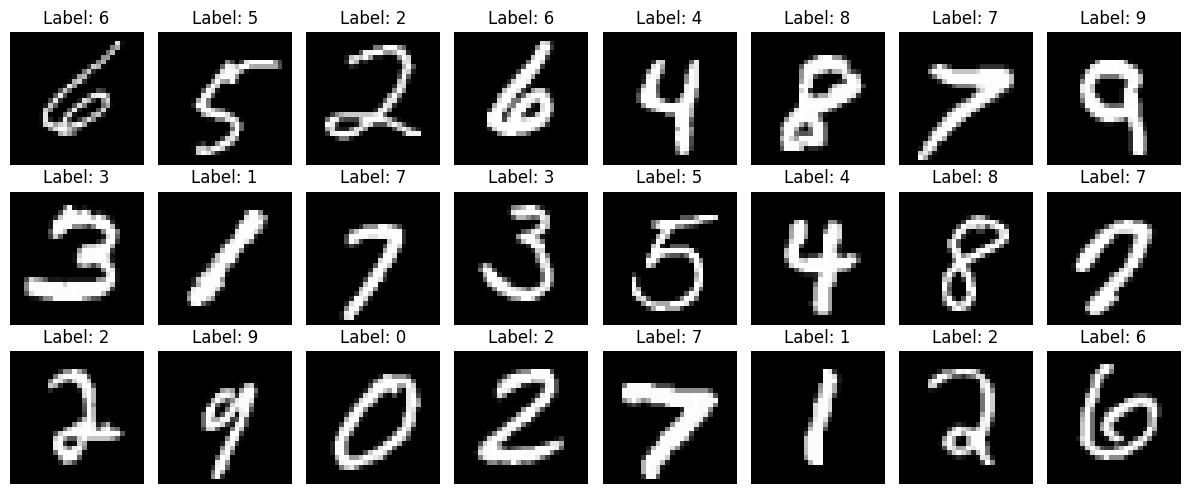

In [ ]:
# Vizualization of images and its labels
fig, axes = plt.subplots(3,8, figsize = (12,5))
axes = axes.flatten()
indices = random.sample(range(len(train_data)), 24)

for i, idx in enumerate(indices):
    image = train_data.iloc[idx, 1:].values.reshape(28, 28)  # Reshape from 1D to 2D
    label = train_data.iloc[idx, 0]  # Labelling
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

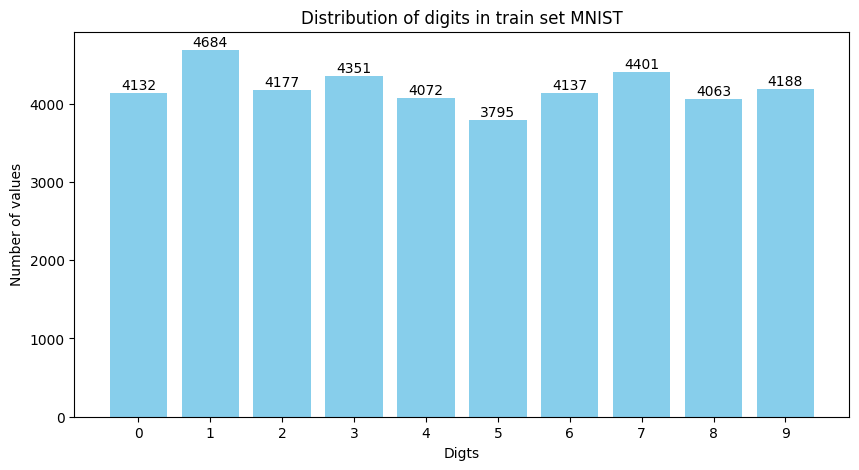

In [ ]:
def bar_values(bars):
    '''The function adds labels to the bars in the bar chart.'''
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 5, int(height),
                 ha='center', va='bottom')
        
#Count the number of occurrences of each label
label_counter = Y.value_counts().sort_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(label_counter.index, label_counter.values, color='skyblue')
bar_values(bars)

plt.xticks(range(10))
plt.xlabel('Digts')
plt.ylabel('Number of values')
plt.title('Distribution of digits in train set MNIST')
plt.show()

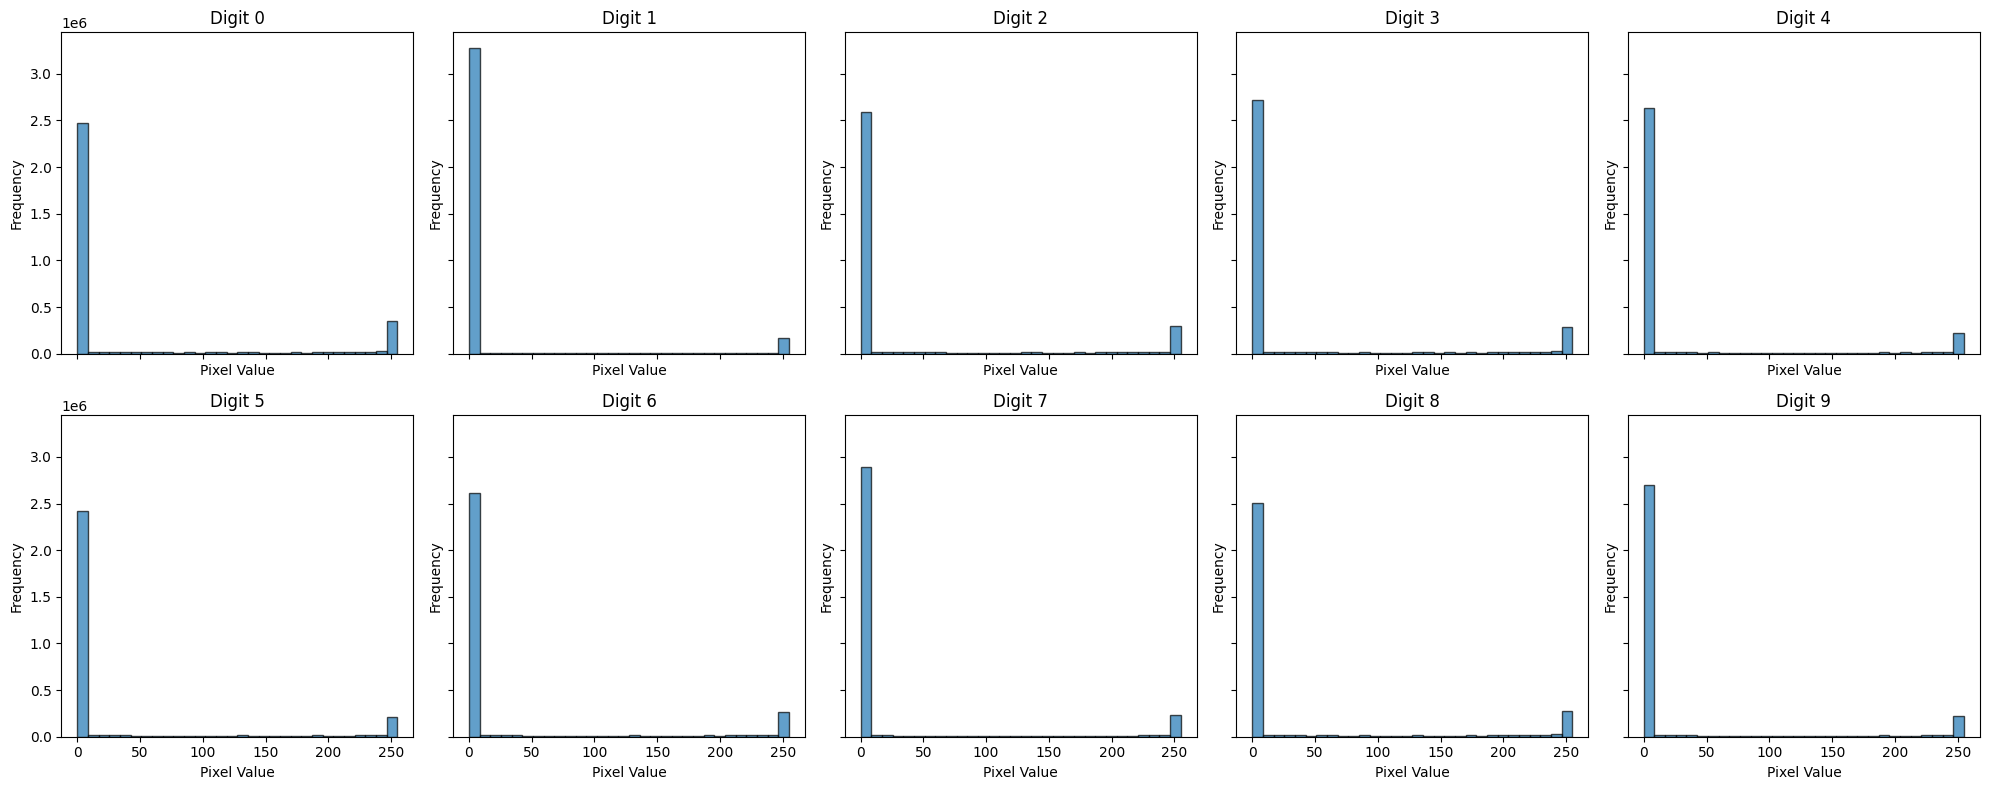

In [90]:
digit_pixel_values = {i: [] for i in range(10)}

# Iteration through the DataFrame rows
for _, row in train_data.iterrows():
    label = row['label']
    pixels = row.drop('label').values  # Retrieve pixel values (all columns except ‘label’)
    digit_pixel_values[label].extend(pixels)


fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(10):
    axes[i].hist(digit_pixel_values[i], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Digit {i}')
    axes[i].set_xlabel('Pixel Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Machnie learning - logistic regression 

In [91]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle=True)

In [92]:
print("X_train shape is : ",X_train.shape)
print("Y_train shape is : ", Y_train.shape)
print("X_val shape is " , X_val.shape)
print("Y_val shape is " , Y_val.shape)

X_train shape is :  (33600, 784)
Y_train shape is :  (33600,)
X_val shape is  (8400, 784)
Y_val shape is  (8400,)


In [93]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
y_pred = logistic_regression.predict(X_val)

acc_logr = round(accuracy_score(Y_val, y_pred) * 100, 2)
conf_matrix = confusion_matrix(Y_val, y_pred)
class_report = classification_report(Y_val, y_pred)

print(f"Accuracy on validation data: {acc_logr}%")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy on validation data: 92.17%
Confusion Matrix:
[[789   0   1   1   3  13   7   0   2   0]
 [  0 888   4   0   1   4   1   2   7   2]
 [  4  11 762  11  13   7  11   8  18   1]
 [  1   3  25 828   0  33   2   7  23  15]
 [  3   2   4   1 787   2   9   4   4  23]
 [  8   2   6  22   8 621  18   3  11   3]
 [  7   1   6   0   4   8 754   1   3   1]
 [  0   2  10   7  11   4   0 825   3  31]
 [  3  12   6  29   7  27   6   4 736   5]
 [  6   4   3  13  18   5   0  30   7 752]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.96      0.98      0.97       909
           2       0.92      0.90      0.91       846
           3       0.91      0.88      0.90       937
           4       0.92      0.94      0.93       839
           5       0.86      0.88      0.87       702
           6       0.93      0.96      0.95       785
           7       0.93      0.92      0.93       893
     

/Users/franekbiskup/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Confusion matrix and conculsion

In [94]:
train_conf_matrix = confusion_matrix(Y_train, logistic_regression.predict(X_train))
train_conf_matrix

array([[3240,    0,    6,    5,    3,   21,   19,    4,   15,    3],
       [   0, 3695,   12,   15,    3,   11,    2,    6,   26,    5],
       [   7,   27, 3056,   49,   34,   11,   26,   34,   70,   17],
       [   7,   13,   65, 3128,    3,   97,    9,   21,   45,   26],
       [   5,   14,   14,    4, 3066,    4,   21,    8,   13,   84],
       [  24,    9,   22,   89,   29, 2792,   37,    8,   60,   23],
       [  16,    5,   12,    0,   17,   33, 3260,    1,    7,    1],
       [   5,   12,   37,    9,   17,    5,    3, 3328,    4,   88],
       [  20,   52,   20,   76,   11,   54,   13,    8, 2934,   40],
       [  13,   12,    7,   34,   64,   19,    0,   87,   25, 3089]])

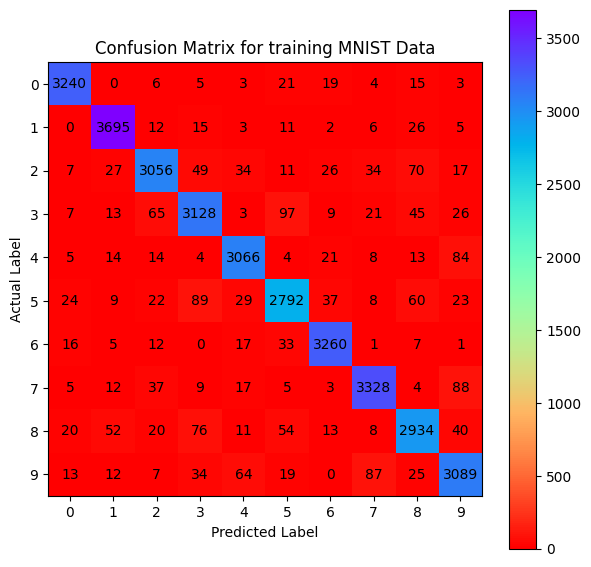

In [95]:
plt.figure(figsize=(7,7))
plt.imshow(train_conf_matrix,cmap='rainbow_r')
plt.title("Confusion Matrix for training MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()

width,height = train_conf_matrix.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(train_conf_matrix[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

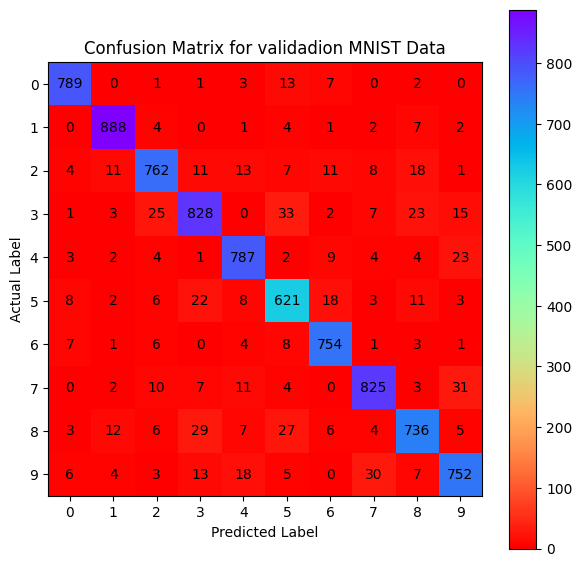

In [96]:
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix,cmap='rainbow_r')
plt.title("Confusion Matrix for validadion MNIST Data")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.colorbar()

width,height = conf_matrix.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(conf_matrix[x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center')
plt.show()

With an accuracy of 92.17% on the validation data, the model recognises the digits with high precision, the biggest problem is with distinguishing between:
- 3 and 5,
- 3 and 8,
- 7 and 9, 

but these are small errors and the model runs quite smoothly.

# Deep learning 

In [97]:
def df_to_tensor(df):
    # Convert DataFrame to float type
    df = df.astype(float)
    # Convert DataFrame to NumPy array
    numpy_array = df.values
    # Convert NumPy array to PyTorch tensor with float32 type
    to_tensor = torch.tensor(numpy_array, dtype=torch.float32)
    return to_tensor

In [98]:
class Data(Dataset):
    def __init__(self, X, Y):
        # Convert input data and labels to tensors
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.Y = torch.tensor(Y.values, dtype=torch.long)

    def __len__(self):
        # Return the number of samples in the dataset
        return len(self.X)
    
    def __getitem__(self, index):
        # Return the sample and label at the specified index
        return self.X[index], self.Y[index]
    
# Create training and test datasets
train_dataset = Data(X_train, Y_train)
test_dataset = Data(X_val, Y_val)

### Data loaders

In [99]:
batch_size = 64

# Dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(X_test, batch_size = batch_size, shuffle=False)

### Model 1 

In [100]:
# model 1
class nnSimple(nn.Module):
    def __init__(self):
        super(nnSimple, self).__init__()
        # Define the network layers
        self.fc1 = nn.Linear(28*28, 128)  
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  

        self.dropout = nn.Dropout(p=0.2)      

    def forward(self, x):
        # Forward pass through the network
        x = x.view(-1, 28*28)  
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)  
        x = self.fc3(x) 
        return x

In [106]:
model1 = nnSimple()

# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = optim.SGD(model1.parameters(), lr = 0.001, momentum = 0.85)

### Model 2

In [102]:
# model 2 
class nnClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 10)

        self.dropout = nn.Dropout(p = 0.2)
        self.log_softmax = F.log_softmax

    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))

        x = self.log_softmax(self.fc5(x), dim = 1)

        return x

In [103]:
model2 = nnClassifier()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr = 0.001, momentum = 0.85)

In [104]:
# Confusion matrix function

def plot_confusion_matrix(data_loader, model, device, data_source):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # calculate matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='rainbow_r', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {data_source}')
    plt.show()

### Training loop for the model 1 

In [107]:
# Loop for nnSimple model
num_epochs = 25

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []


for epoch in range(num_epochs):
    model1.train() # set the model into training mode
    correct = 0
    total = 0
    running_loss = 0.0
    
    # training loop
    for data in train_loader:
        # Downloading data from the dataloader
        inputs, targets = data
        # Zeroing gradients
        optimizer.zero_grad()
        # Prediction
        pred = model1(inputs)
        # Loss calculation
        loss = criterion(pred, targets)
        # Backpropagation (calculation of gradients)
        loss.backward()
        # Weights update
        optimizer.step()
        # Summary of losses to be displayed
        running_loss += loss.item()
        # Class prediction (choose the index of the largest value)
        _, predicted = torch.max(pred.data, 1)
        # Counting correct predictions
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    
    # Calculation of the accuracy for a given epoch
    train_accuracy = 100 * correct / total
    # Recording loss and accuracy
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    
    model1.eval() # set the model into evaluation mode
    val_loss = 0.0
    correct = 0 
    total = 0
    
    # validation loop       
    with torch.no_grad():
        for data in val_loader:
            inputs, targets = data
            pred = model1(inputs)
            loss = criterion(pred, targets)
            val_loss += loss.item()
            _, predicted = torch.max(pred.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    # Calculation of the accuracy for a given epoch
    val_accuracy = 100 * correct / total
    # Recording loss and accuracy
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)


    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

Epoch 1/25, Train Loss: 2.2504, Train Accuracy: 26.65%, Validation Loss: 2.1506, Validation Accuracy: 56.02%
Epoch 2/25, Train Loss: 1.9060, Train Accuracy: 51.13%, Validation Loss: 1.4999, Validation Accuracy: 70.08%
Epoch 3/25, Train Loss: 1.2177, Train Accuracy: 66.93%, Validation Loss: 0.8580, Validation Accuracy: 79.64%
Epoch 4/25, Train Loss: 0.8422, Train Accuracy: 74.86%, Validation Loss: 0.6311, Validation Accuracy: 84.26%
Epoch 5/25, Train Loss: 0.6864, Train Accuracy: 79.39%, Validation Loss: 0.5246, Validation Accuracy: 86.30%
Epoch 6/25, Train Loss: 0.5994, Train Accuracy: 82.07%, Validation Loss: 0.4613, Validation Accuracy: 87.89%
Epoch 7/25, Train Loss: 0.5432, Train Accuracy: 83.97%, Validation Loss: 0.4225, Validation Accuracy: 88.80%
Epoch 8/25, Train Loss: 0.4999, Train Accuracy: 85.34%, Validation Loss: 0.3952, Validation Accuracy: 89.12%
Epoch 9/25, Train Loss: 0.4738, Train Accuracy: 86.11%, Validation Loss: 0.3724, Validation Accuracy: 89.62%
Epoch 10/25, Train 

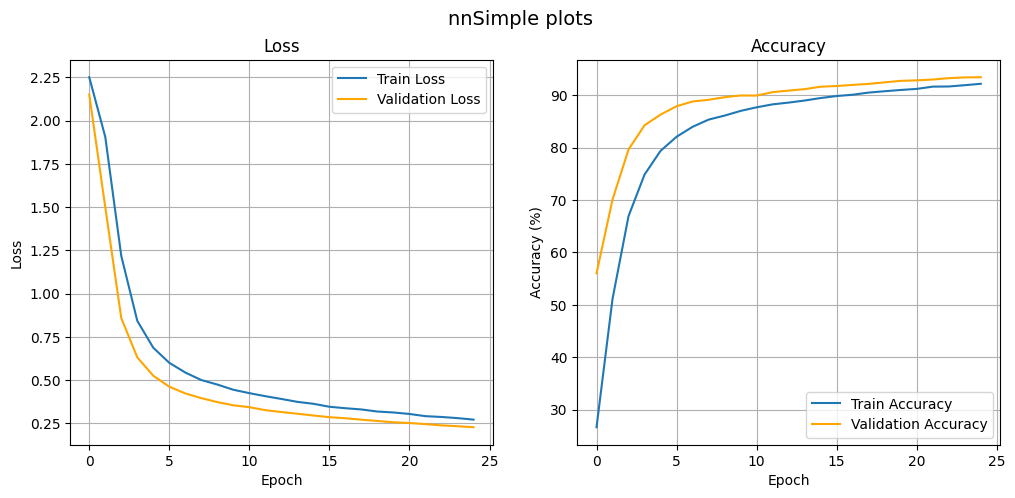

In [108]:
# Loss and accuracy plots
plt.figure(figsize=(12, 5))
plt.suptitle('nnSimple plots', fontsize=14)

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

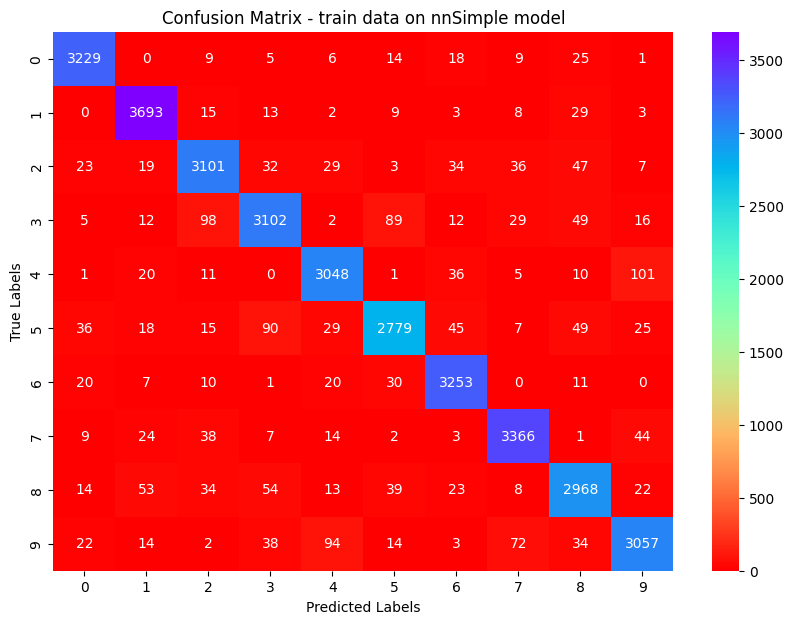

In [109]:
model1.to(device)  
plot_confusion_matrix(train_loader, model1, device, 'train data on nnSimple model')

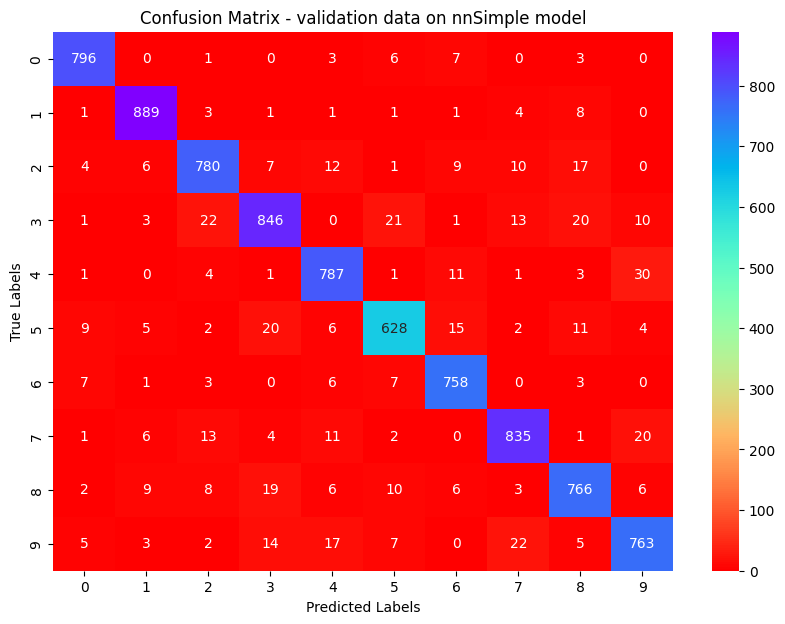

In [110]:
model1.to(device)  
plot_confusion_matrix(val_loader, model1, device, 'validation data on nnSimple model')

Neutral network model nnSimple with the accuracy on validation data 93.43% is better than ML alghoritm -logistic regression. The main problem is with recognition digts:
- 3 and 8,
- 4 and 9,
- 7 and 9, 

### Training loop for the model 2

In [75]:
# Loop for nnClassifier model
num_epochs = 25

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []


for epoch in range(num_epochs):
    model2.train() # set the model into training mode
    correct = 0
    total = 0
    running_loss = 0.0
    
    # training loop
    for data in train_loader:
        # Downloading data from the dataloader
        inputs, targets = data
        # Zeroing gradients
        optimizer.zero_grad()
        # Prediction
        pred = model2(inputs)
        # Loss calculation
        loss = criterion(pred, targets)
        # Backpropagation (calculation of gradients)
        loss.backward()
        # Weights update
        optimizer.step()
        # Summary of losses to be displayed
        running_loss += loss.item()
        # Class prediction (choose the index of the largest value)
        _, predicted = torch.max(pred.data, 1)
        # Counting correct predictions
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    
    # Calculation of the accuracy for a given epoch
    train_accuracy = 100 * correct / total
    # Recording loss and accuracy
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    
    model2.eval() # set the model into evaluation mode
    val_loss = 0.0
    correct = 0 
    total = 0
    
    # validation loop       
    with torch.no_grad():
        for data in val_loader:
            inputs, targets = data
            pred = model2(inputs)
            loss = criterion(pred, targets)
            val_loss += loss.item()
            _, predicted = torch.max(pred.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    # Calculation of the accuracy for a given epoch
    val_accuracy = 100 * correct / total
    # Recording loss and accuracy
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)


    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracy:.2f}%')


Epoch 1/25, Train Loss: 1.7495, Train Accuracy: 39.93%, Validation Loss: 0.6965, Validation Accuracy: 76.74%
Epoch 2/25, Train Loss: 0.5714, Train Accuracy: 82.71%, Validation Loss: 0.3102, Validation Accuracy: 90.76%
Epoch 3/25, Train Loss: 0.3162, Train Accuracy: 90.97%, Validation Loss: 0.1974, Validation Accuracy: 93.92%
Epoch 4/25, Train Loss: 0.2287, Train Accuracy: 93.69%, Validation Loss: 0.1574, Validation Accuracy: 95.29%
Epoch 5/25, Train Loss: 0.1764, Train Accuracy: 94.90%, Validation Loss: 0.1310, Validation Accuracy: 95.90%
Epoch 6/25, Train Loss: 0.1510, Train Accuracy: 95.81%, Validation Loss: 0.1210, Validation Accuracy: 96.18%
Epoch 7/25, Train Loss: 0.1244, Train Accuracy: 96.61%, Validation Loss: 0.1136, Validation Accuracy: 96.67%
Epoch 8/25, Train Loss: 0.1099, Train Accuracy: 96.85%, Validation Loss: 0.1043, Validation Accuracy: 96.75%
Epoch 9/25, Train Loss: 0.0940, Train Accuracy: 97.38%, Validation Loss: 0.1085, Validation Accuracy: 96.90%
Epoch 10/25, Train 

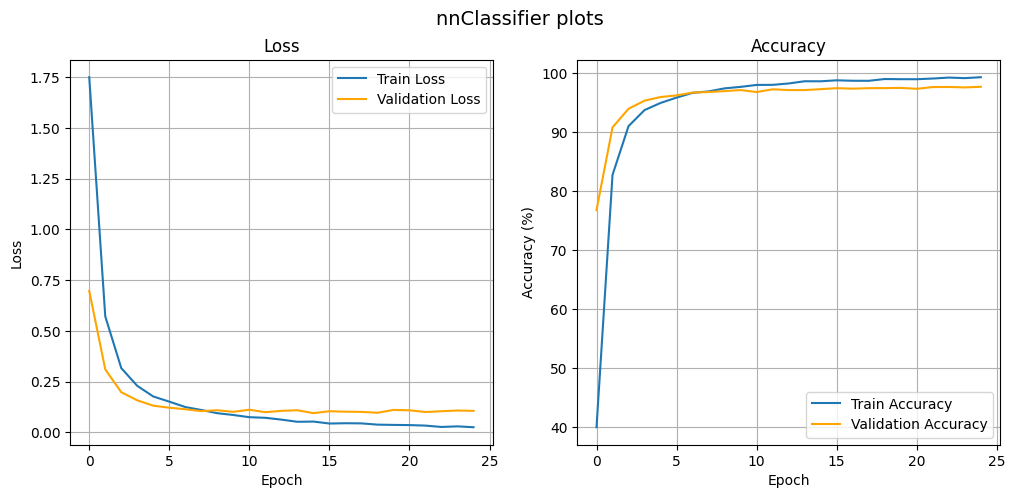

In [76]:
# Loss and accuracy plots
plt.figure(figsize=(12, 5))
plt.suptitle('nnClassifier plots', fontsize=14)

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy', color='orange') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

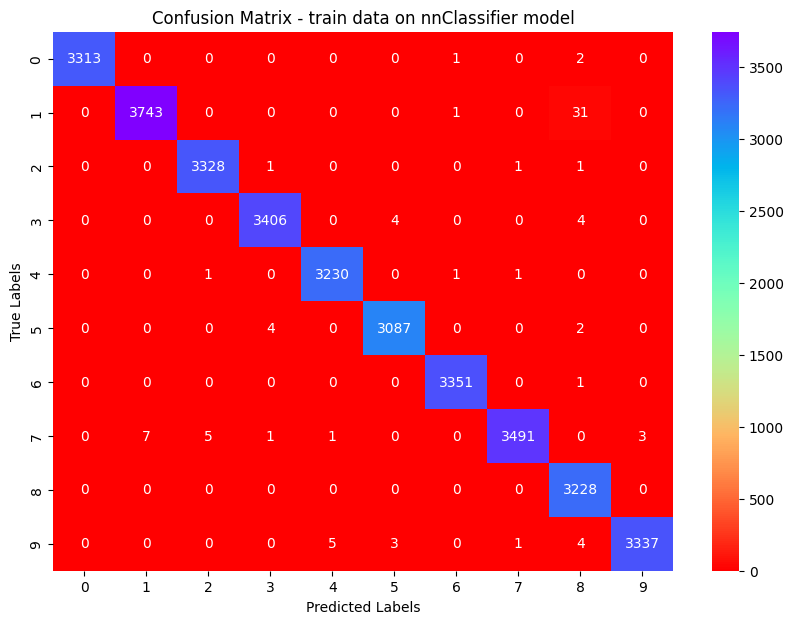

In [77]:
model2.to(device)  
plot_confusion_matrix(train_loader, model2, device, 'train data on nnClassifier model')

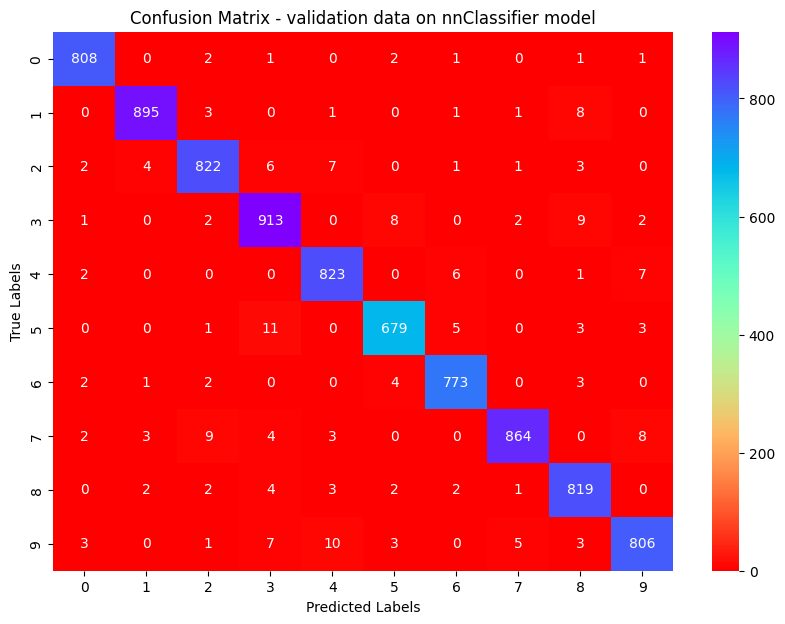

In [78]:
model2.to(device)  
plot_confusion_matrix(val_loader, model2, device, 'validation data on nnClassifier model')

Neutral network model nnClassifier with the accuracy on validation data 97.64% is perform better than logistic regression and nnSimple. The main problem is with recognition digts:
- 3 and 5,
- 4 and 9,
- 7 and 9, 